# Loading Audio Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyAudioAnalysis import MidTermFeatures as aF
import os


dirs = ["audio_data/open_middle_door_train/", "audio_data/grant_me_access_train/", "audio_data/unlock_the_gate_train/"]  
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05 
class_names = [os.path.dirname(d) for d in dirs]

# segment-level feature extraction:
features = [] 
for d in dirs: # get feature matrix for each directory (class) 
    f, files, fn = aF.directory_feature_extraction(d, m_win, m_step, 
                                                   s_win, s_step) 
    features.append(f)
    
# (each element of the features list contains a 
# (samples x segment features) = (48 x 138) feature matrix)
print(features[0].shape, features[1].shape, features[2].shape)

C:\Users\memaa\Documents\DSP Projects\TASK5\Security-Voice-code-Access\venv\Lib\site-packages\pyAudioAnalysis\..\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Analyzing file 1 of 48: audio_data/open_middle_door_train\1 (2).wav
Analyzing file 2 of 48: audio_data/open_middle_door_train\1.wav
Analyzing file 3 of 48: audio_data/open_middle_door_train\11 (2).wav
Analyzing file 4 of 48: audio_data/open_middle_door_train\11.wav
Analyzing file 5 of 48: audio_data/open_middle_door_train\12 (2).wav
Analyzing file 6 of 48: audio_data/open_middle_door_train\12.wav
Analyzing file 7 of 48: audio_data/open_middle_door_train\13 (2).wav
Analyzing file 8 of 48: audio_data/open_middle_door_train\13.wav
Analyzing file 9 of 48: audio_data/open_middle_door_train\14 (2).wav
Analyzing file 10 of 48: audio_data/open_middle_door_train\14.wav
Analyzing file 11 of 48: audio_data/open_middle_door_train\15 (2).wav
Analyzing file 12 of 48: audio_data/open_middle_door_train\15.wav
Analyzing file 13 of 48: audio_data/open_middle_door_train\16 (2).wav
Analyzing file 14 of 48: audio_data/open_middle_door_train\16.wav
Analyzing file 15 of 48: audio_data/open_middle_door_train\

## Visualization of selected features

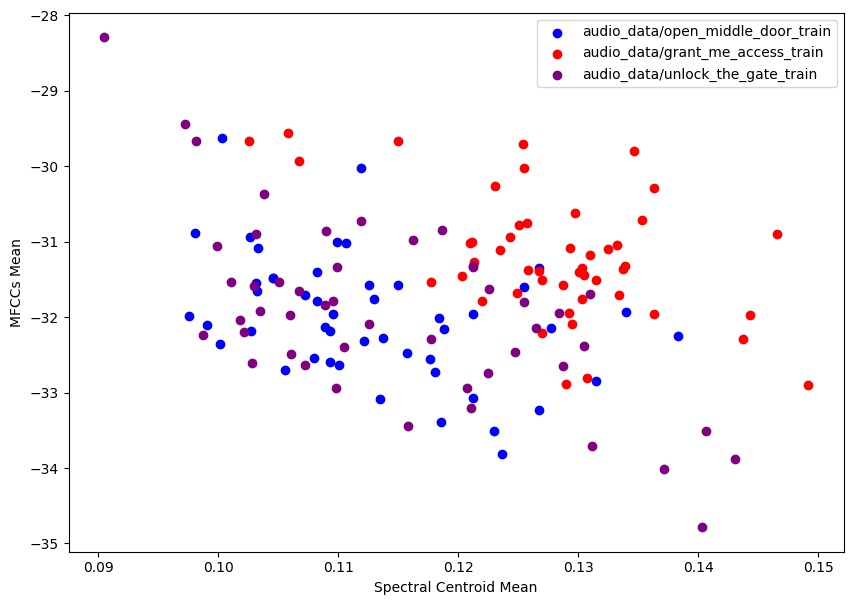

In [2]:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('mfcc_1_mean')]])
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('mfcc_1_mean')]])
f3 = np.array([features[2][:, fn.index('spectral_centroid_mean')],
               features[2][:, fn.index('mfcc_1_mean')]])

# Check if features were extracted
if f1 is not None and f2 is not None and f3 is not None:
    # Plot features
    plt.figure(figsize=(10, 7))
    plt.scatter(x=f1[0, :],  y=f1[1, :], 
                    label=class_names[0], color='b')
    plt.scatter(x=f2[0, :], y=f2[1, :], 
                    label=class_names[1], color='r')
    plt.scatter(x=f3[0, :], y=f3[1, :], 
                    label=class_names[2], color='purple')
    plt.xlabel('Spectral Centroid Mean')
    plt.ylabel('MFCCs Mean')
    plt.legend()
    plt.show()
else:
    print("No features were extracted. Please check the directory paths and contents.")

In [3]:
from pyAudioAnalysis.audioTrainTest import extract_features_and_train

# train the svm classifier
extract_features_and_train(dirs, m_win, m_step, s_win, s_step, "svm_rbf", "svm_model_words")


Analyzing file 1 of 48: audio_data/open_middle_door_train\1 (2).wav
Analyzing file 2 of 48: audio_data/open_middle_door_train\1.wav
Analyzing file 3 of 48: audio_data/open_middle_door_train\11 (2).wav
Analyzing file 4 of 48: audio_data/open_middle_door_train\11.wav
Analyzing file 5 of 48: audio_data/open_middle_door_train\12 (2).wav
Analyzing file 6 of 48: audio_data/open_middle_door_train\12.wav
Analyzing file 7 of 48: audio_data/open_middle_door_train\13 (2).wav
Analyzing file 8 of 48: audio_data/open_middle_door_train\13.wav
Analyzing file 9 of 48: audio_data/open_middle_door_train\14 (2).wav
Analyzing file 10 of 48: audio_data/open_middle_door_train\14.wav
Analyzing file 11 of 48: audio_data/open_middle_door_train\15 (2).wav
Analyzing file 12 of 48: audio_data/open_middle_door_train\15.wav
Analyzing file 13 of 48: audio_data/open_middle_door_train\16 (2).wav
Analyzing file 14 of 48: audio_data/open_middle_door_train\16.wav
Analyzing file 15 of 48: audio_data/open_middle_door_train\

In [6]:
from pyAudioAnalysis import audioTrainTest as aT
dirc = ['audio_data/open_middle_door_test/', 'audio_data/grant_me_access_test/', 'audio_data/unlock_the_gate_test/']

for d in dirc:
    for filename in os.listdir(d):
        if os.path.isfile(os.path.join(d, filename)):
            print(f'{os.path.join(d, filename)}')
            c, p, p_nam = aT.file_classification(os.path.join(d, filename), "svm_model_words","svm_rbf")
            print(f'P({p_nam[0]}={p[0]})')
            print(f'P({p_nam[1]}={p[1]})')
            print(f'P({p_nam[2]}={p[2]})')
            print()

audio_data/open_middle_door_test/10 (2).wav
P(audio_data/open_middle_door_train/=0.9868411145027218)
P(audio_data/grant_me_access_train/=0.0006414197005200228)
P(audio_data/unlock_the_gate_train/=0.012517465796758147)

audio_data/open_middle_door_test/10.wav
P(audio_data/open_middle_door_train/=0.9469241950949802)
P(audio_data/grant_me_access_train/=0.0006343184758790262)
P(audio_data/unlock_the_gate_train/=0.05244148642914098)

audio_data/open_middle_door_test/19 (2).wav
P(audio_data/open_middle_door_train/=0.9927649040905796)
P(audio_data/grant_me_access_train/=0.003400030977161093)
P(audio_data/unlock_the_gate_train/=0.0038350649322593804)

audio_data/open_middle_door_test/19.wav
P(audio_data/open_middle_door_train/=0.8855630254546826)
P(audio_data/grant_me_access_train/=0.03136516926264605)
P(audio_data/unlock_the_gate_train/=0.08307180528267119)

audio_data/open_middle_door_test/20 (2).wav
P(audio_data/open_middle_door_train/=0.9830681108688342)
P(audio_data/grant_me_access_train/